# Exploratory Data Analysis Allobank FAQ

## Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect


## Load & Preprocessing Data FAQ

In [2]:
# Load data FAQ
df = pd.read_csv('../Dataset/faq_allobank.csv').copy()
df

,category,question,answer
0,UMUM,Apa itu Allo Bank?,Sebuah layanan perbankan berbasis digital yang...
1,UMUM,Kapan Allo Bank didirikan di Indonesia?,Allo Bank didirikan di Indonesia pada tahun 2021.
2,UMUM,Apakah Allo Bank terdaftar dan diawasi oleh Ot...,Benar! Allo Bank telah terdaftar dan diawasi o...
3,UMUM,Apakah menyimpan dana di Allo Bank dipastikan ...,Tentu saja! Allo Bank terdaftar sebagai pesert...
4,UMUM,Apakah Allo Bank memiliki kantor cabang?,"Saat ini, Allo Bank memiliki dua kantor cabang..."
...,...,...,...
364,REGISTRASI,Mengapa username dan Password saya diinfokan s...,Pastikan password yang dimasukkan sudah benar....
365,REGISTRASI,Apa yang harus saya lakukan apabila saya tidak...,Anda dapat menutup aplikasi Allo Bank dan memb...
366,REGISTRASI,Apa yang harus saya lakukan apabila saat Login...,Anda dapat menutup aplikasi Allo Bank dan memb...
367,REGISTRASI,Anda dapat menutup aplikasi Allo Bank dan memb...,Anda dapat menutup aplikasi Allo Bank dan memb...


In [3]:
# Display Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  369 non-null    object
 1   question  369 non-null    object
 2   answer    369 non-null    object
dtypes: object(3)
memory usage: 8.8+ KB


In [4]:
df.isnull().sum()

category    0
question    0
answer      0
dtype: int64

Dataset FAQ berisi 369 baris data Category, Question, dan Answer. Semua data bertipe text/object dan tidak memiliki missing value. Selanjutnya akan dilakukan pengecekan apakah semua data FAQ dalam bahasa indonesia atau tidak.

In [5]:
# Data FAQ Language Check
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

df['question_language'] = df['question'].apply(detect_language)
df['answer_language'] = df['answer'].apply(detect_language)

df_en = df[df['question_language'] == 'en'].copy()

In [6]:
# Show data with english language
df_en

,category,question,answer,question_language,answer_language
200,LAYANAN,Apa itu Allo Grow?,Allo Grow adalah produk tabungan baru dari All...,en,id
208,LAYANAN,What is the difference between Allo Prime and ...,Allo Prime is an account that you can use for ...,en,en
210,LAYANAN,How much does it cost to save money in the All...,There are no administration fees to customers ...,en,en
211,LAYANAN,How much does it cost to save money in the All...,There are no administration fees to customers ...,en,en
213,LAYANAN,Is there a minimum balance to save money in Al...,"Yes, you can save money at Allo Grow starting ...",en,en
217,LAYANAN,Can I add funds to the savings that I had prev...,"Sorry, currently you are not able to add funds...",en,en
220,LAYANAN,How to withdraw Instant Cash funds?,"To open an Allo Grow savings account, you can ...",en,en


Dari hasil pengecekan ternyata terdeteksi 7 baris data merupakan Q&A dalam bahasa inggris, namun saat ditinjau kembali ada 1 baris yang sebenarnya bukan dalam bahasa inggris melainkan bahasa indonesia hal ini terjadi bisa dikarenakan nama sebuah fitur pada Allo bank yaitu Allo Grow menggunakan bahasa inggris sehingga terdeteksi sebagai teks dalam bahasa inggris. Oleh karena itu, untuk baris tersebut akan dipertahankan dan untuk yang lainnya akan di-drop.

In [7]:
# Drop data with english language
## Drop Index 208, 210, 211, 213, 217, 220
indices_to_drop = [208, 210, 211, 213, 217, 220]
df_lang_clean = df.drop(indices_to_drop).reset_index(drop=True)

Kolom 'question_language', dan 'answer_language' akan di-drop karena sudah selesai penggunaannya. Selanjutnya akan dilakukan pengecekan duplikat data.

In [8]:
# Drop Language Detection Column
col_to_drop = ['question_language', 'answer_language']
df_lang_clean = df_lang_clean.drop(col_to_drop, axis=1)
df_lang_clean

,category,question,answer
0,UMUM,Apa itu Allo Bank?,Sebuah layanan perbankan berbasis digital yang...
1,UMUM,Kapan Allo Bank didirikan di Indonesia?,Allo Bank didirikan di Indonesia pada tahun 2021.
2,UMUM,Apakah Allo Bank terdaftar dan diawasi oleh Ot...,Benar! Allo Bank telah terdaftar dan diawasi o...
3,UMUM,Apakah menyimpan dana di Allo Bank dipastikan ...,Tentu saja! Allo Bank terdaftar sebagai pesert...
4,UMUM,Apakah Allo Bank memiliki kantor cabang?,"Saat ini, Allo Bank memiliki dua kantor cabang..."
...,...,...,...
358,REGISTRASI,Mengapa username dan Password saya diinfokan s...,Pastikan password yang dimasukkan sudah benar....
359,REGISTRASI,Apa yang harus saya lakukan apabila saya tidak...,Anda dapat menutup aplikasi Allo Bank dan memb...
360,REGISTRASI,Apa yang harus saya lakukan apabila saat Login...,Anda dapat menutup aplikasi Allo Bank dan memb...
361,REGISTRASI,Anda dapat menutup aplikasi Allo Bank dan memb...,Anda dapat menutup aplikasi Allo Bank dan memb...


In [9]:
# Data Duplicates Check for Question column
question_duplicates = df_lang_clean.duplicated(subset=["question"], keep=False).sum()
print(f"Duplikat pertanyaan: {question_duplicates}")

Duplikat pertanyaan: 22


In [10]:
# Show Duplicate Question
df_lang_clean[df_lang_clean.duplicated(subset=["question"], keep=False)]

,category,question,answer
64,AKUN,Di mana saya bisa menemukan file e-statement s...,Anda bisa mendapatkan file e-statement pada ta...
65,AKUN,Di mana saya bisa menemukan file e-statement s...,Anda bisa mendapatkan file e-statement pada ta...
139,LAYANAN,Apa itu Allo Pay?,Allo Pay adalah produk uang elektronik jenis u...
140,LAYANAN,Apa itu Allo Pay?,Allo Pay adalah produk uang elektronik jenis u...
153,LAYANAN,Bagaimana jika KTP saya sudah menggunakan KTP ...,Saat ini Allo Bank belum mendukung registrasi ...
154,LAYANAN,Bagaimana jika KTP saya sudah menggunakan KTP ...,Saat ini Allo Bank belum mendukung registrasi ...
187,LAYANAN,Bagaimana caranya jika saya ingin membatalkan ...,Setelah Anda mengkonfirmasi persetujuan pengaj...
195,LAYANAN,Jika tanggal jatuh tempo jatuh pada hari libur...,"Ya, Anda tetap bisa melakukan pembayaran meski..."
196,LAYANAN,Apakah saya akan mendapatkan notifikasi pada s...,Anda akan mendapatkan notifikasi sejak H-1 dan...
197,LAYANAN,Apakah saya dapat mengajukan lebih dari 1 (sat...,"Ya, Anda dapat melakukan pengajuan lebih dari ..."


Berdasarkan kolom question, terdapat 22 data duplikat yang terdeteksi. Untuk memastikan bahwa proses pelatihan retriever lebih efisien, tidak bias, dan menghasilkan model yang lebih baik dalam penanganan variasi pertanyaan user pada aplikasi RAG maka data duplikat akan di-drop.

In [11]:
# Drop Duplicate
df_clean = df_lang_clean.drop_duplicates(subset=["question"]).reset_index(drop=True)
df_clean[df_clean.duplicated(subset=["question"], keep=False)]

,category,question,answer


In [12]:
# Data Duplicates Check for Answer column
answer_duplicates = df_clean.duplicated(subset=["answer"]).sum()
print(f"Duplikat jawaban: {answer_duplicates}")

Duplikat jawaban: 20


In [13]:
# Show Duplicate Answer
df_clean[df_clean.duplicated(subset=["answer"], keep=False)]

,category,question,answer
66,AKUN,Apa yang harus saya lakukan jika saya lupa nom...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
71,AKUN,Apa yang harus saya lakukan ketika saya tetap ...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
87,AKUN,Apakah saya bisa mengajukan pembukaan blokir a...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
88,AKUN,Apakah ada syarat dan ketentuan untuk mengajuk...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
89,AKUN,Apa saja dokumen pendukung yang dibutuhkan unt...,"Tidak perlu khawatir, Anda dapat menghubungi A..."
95,PRODUK,Mengapa saya tidak bisa menggunakan Allo Pay s...,Mungkin Kamu telah melebihi batas pembayaran p...
96,PRODUK,Mengapa saya tidak bisa menggunakan Allo Pay+ ...,Mungkin Kamu telah melebihi batas pembayaran p...
161,LAYANAN,Berapa suku bunga yang akan saya dapat dengan ...,Anda dapat melihat detail terkait suku bunga y...
162,LAYANAN,Bagaimana perhitungan bunga di Allo Prime?,Anda dapat melihat detail terkait suku bunga y...
163,LAYANAN,Apa yang harus saya lakukan jika wajah saya ti...,Anda dapat mencoba lagi dan pastikan bahwa And...


Untuk data duplikat berdasarkan kolom answer terdapat 20 duplikat, tetapi untuk data duplikat dalam kolom answer akan tetap dipertahankan karena beberapa pertanyaan memang bisa jadi memiliki jawaban yang sama, dan dengan mempertahankan duplikat ini dapat membantu model RAG mempelajari distribusi jawaban yang lebih akurat.

## Data Analysis

Sebelum melakukan analisis akan ditambahkan 2 kolom yang meingformasikan banyaknya karakter yang terdapat pada masing masing baris kolom question dan answer untuk keperluan analisis.

In [14]:
# Add column character length for analysis
df_clean["question_len"] = df_clean["question"].apply(len)
df_clean["answer_len"] = df_clean["answer"].apply(len)

### 1. Character Length Distribution

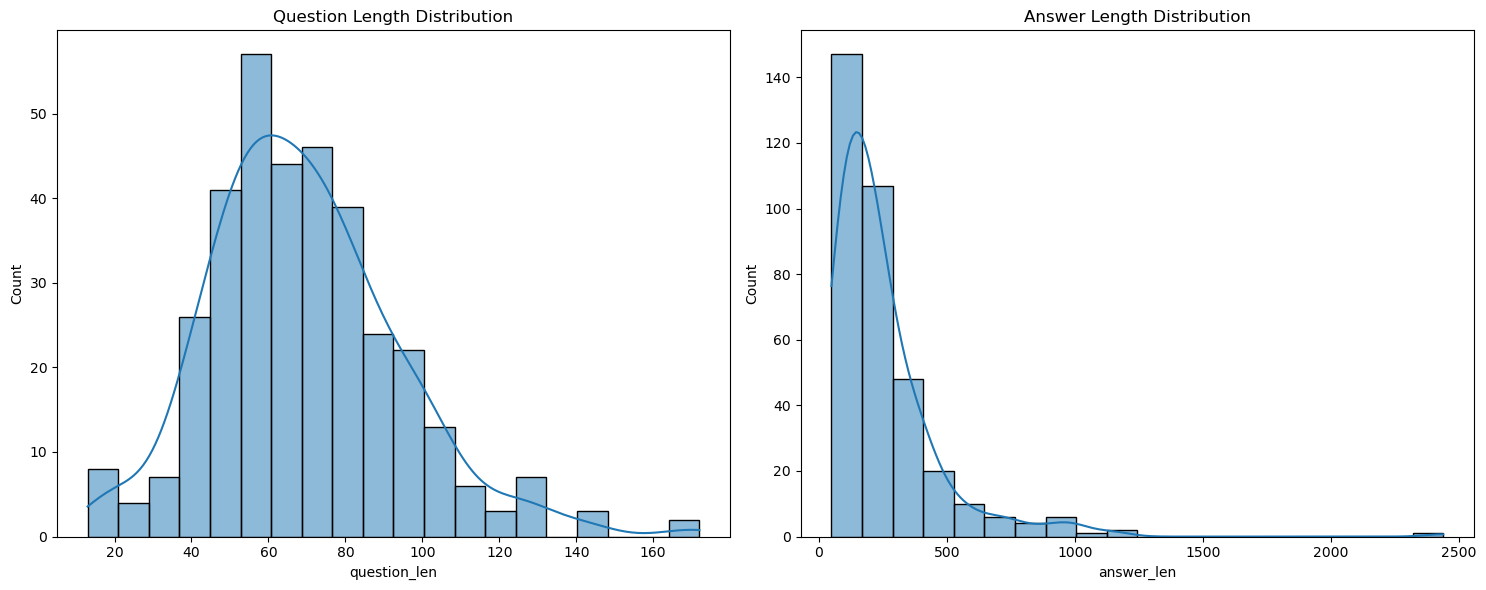

In [15]:
# Create Histogram for Q&A length distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df_clean['question_len'], bins=20, ax=axs[0], kde=True)
axs[0].set_title("Question Length Distribution")
sns.histplot(df_clean['answer_len'], bins=20, ax=axs[1], kde=True)
axs[1].set_title("Answer Length Distribution")
plt.tight_layout()
plt.show()

- Distribusi karakter pada kolom question mayoritas berkisar di 40-00 karakter dengan jumlah terbanyak di 50-60 karakter, ada beberapa pertanyaaan yang memiliki panjang > 140 karakter. pertanyaan pada FAQ cenderung ringkas dan banyaknya karakter raltif seragam, bisa dibilang cocok untuk digunakan sebagai query pada sistem retrieval karena banyaknya karakter cenderung stabil.
- Distribusi karakter pada kolom answer mayoritas dibawah 500 karakter, dengan data paling banyak di sekitar 100-200 karakter, terdapat data yang berisi mendekati 2500 karakter. Untuk kasus ini beberapa jawaban/answer bisa langsung dimasukan dalam vector store, sedangkan untuk jawaban/answer yang panjang sebaiknya dipecah menjadi beberapa chunk mengingat sistem RAG yang akan dibuat menggunakan embedding yang memiliki batas token yaitu OpenAI.

### 2. Basic Text Statistics

In [16]:
# Statistic Overview
df_clean.describe()

,question_len,answer_len
count,352.000000,352.000000
mean,69.215909,250.937500
std,24.848234,226.603653
min,13.000000,49.000000
25%,53.000000,111.000000
50%,67.000000,195.500000
75%,83.000000,301.500000
max,172.000000,2438.000000


Dari basic statistic overview, banyaknya karakter data pada kolom question bisa dibilang terdistribusi normal menunjukan bahwa panjang/banyaknya karakter pada kolom question konsisten, panjang maksimum 172 karakter masih dalam batas wajar untuk query FAQ sehingga tidak perlu preprocessing khusus untuk bagian ini. Sedangkan untuk kolom answer distribusi data skewed dapat dilihat dari terdapatnya median yang lebih rendah dari mean yang artinya terdapat jawaban/answer yang sangat panjang, mayoritas data berada dibawah 500 karakter, tetapi ada juga yang mencapai 2438 karakter sehingga perlu dilakukan chunking untuk data answer. Sebelum itu akan dilakukan identifikasi rata-rata panjang/banyaknya karakter berdasarkan kategori FAQ untuk mengetahui kategori manakah yang perlu mendapatkan perhatian khusus.

### 3. Average Character Length for Answer Column

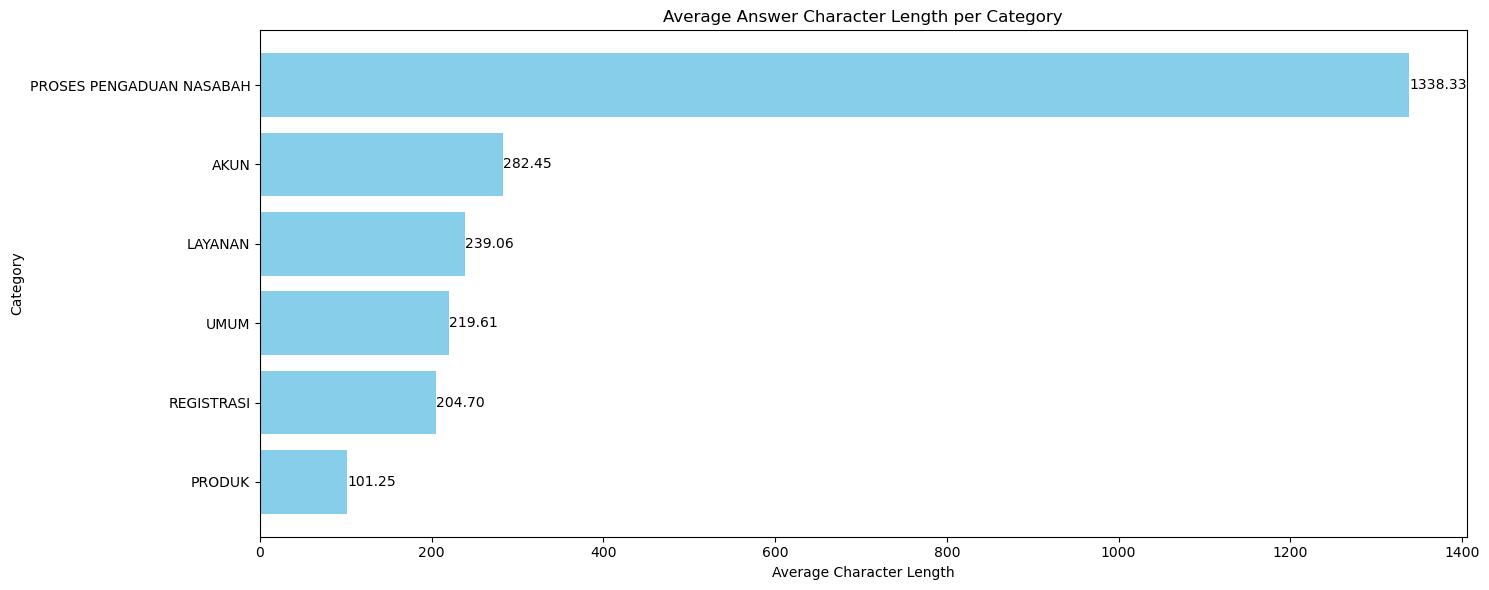

In [17]:
# Average character length for answer per category
avg_cl_a = df_clean.groupby('category')['answer_len'].mean().reset_index()

# Sort by answer_len in descending order
avg_cl_a = avg_cl_a.sort_values('answer_len', ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(15, 6))
bars = plt.barh(avg_cl_a['category'], avg_cl_a['answer_len'], color='skyblue')
plt.title('Average Answer Character Length per Category')
plt.ylabel('Category')
plt.xlabel('Average Character Length')

# Add text labels on each bar
for i, bar in enumerate(bars):
    x = bar.get_width()  # Length of the bar (average character length)
    y = bar.get_y() + bar.get_height() / 2  # Center vertically
    plt.text(x + 0.1, y, f'{x:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


Berdasarkan bar chart di atas sangat jelas terlihat pada kategori PROSES PENGADUAN NASABAH memiliki rata-rata panjang karaketer yang jauh lebih banyak dari kategori lain hal ini terjadi karena pada answer/jawaban pada kategori tersebut berisikan langkah-langkah hingga persyaratan yang cukup mendetail untuk nasabah menyampaikan keluhan kepada Allo Bank. Untuk kategori lainnya terbilang masih tidak terlalu panjang sehingga cukup satu chunk untuk tiap jawaban, dan untuk chunking bisa dilakukan try and error untuk besaran nilai parameternya untuk menghasilkan respon yang terbaik. Selanjutnya akan dibuat wordcloud untuk merepresentasikan frekuensi kata yang paling umum muncul dalam pertanyaan user di FAQ Allo Bank.

### 4. Most Common Word in Question Column

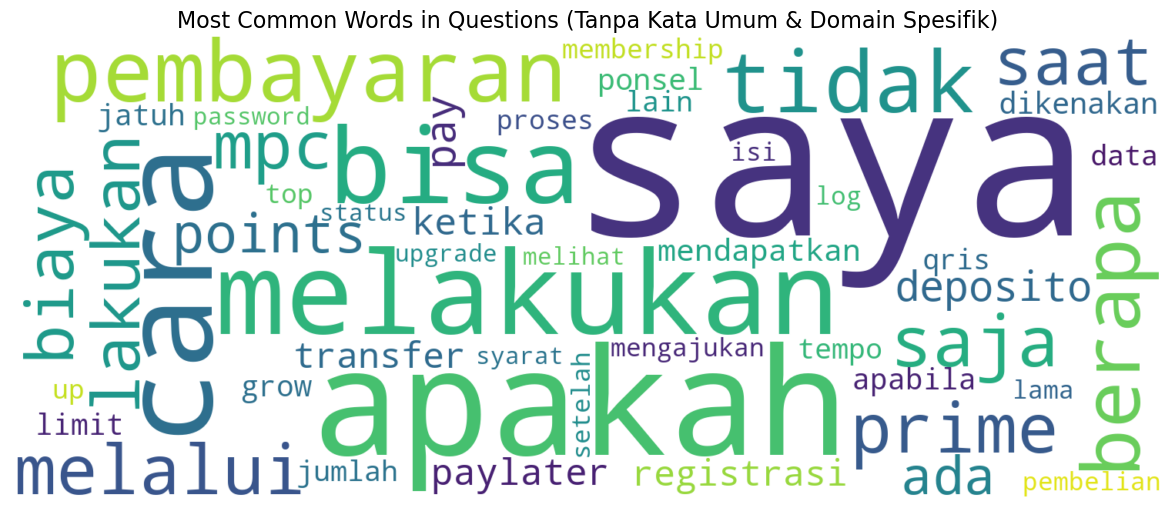

In [18]:
# Basic Stopwords for Indonesian Language
indonesian_stopwords = [
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'atau', 'pada', 'oleh',
    'adalah', 'itu', 'ini', 'karena', 'jika', 'akan', 'dalam', 'sudah', 'telah',
    'sebagai', 'bahwa', 'agar', 'juga', 'dapat', 'harus', 'apa', 'kapan',
    'bagaimana', 'mengapa', 'dimana', 'siapa'
]

# Allo Bank Domain Stopwords
domain_stopwords = [
    'akun', 'pengguna', 'aplikasi', 'layanan', 'verifikasi', 'kode',
    'nomor', 'email', 'telepon', 'masuk', 'login', 'akses', 'transaksi',
    'bank', 'allo', 'saldo', 'topup', 'dompet', 'digital', 'fitur',
    'penggunaan', 'menggunakan', 'digunakan', 'kartu', 'rekening', 'dana'
]

# Combine stopwords
all_stopwords = list(set(indonesian_stopwords + domain_stopwords))

# Vectorize with stopwords
vectorizer = CountVectorizer(stop_words=all_stopwords, max_features=50)
X = vectorizer.fit_transform(df_clean['question'])

# Count words frequency
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Create Wordcloud
wordcloud = WordCloud(width=1500, height=600, background_color='white').generate_from_frequencies(word_freq)

# Display WordCloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Questions (Tanpa Kata Umum & Domain Spesifik)", fontsize=16)
plt.show()

Pada wordcloud, terlihat kata-kata seperti "saya", "apakah", dan "cara" menjadi yang paling sering muncul dalam pertanyaan pengguna. Hal ini menunjukkan kecenderungan pertanyaan yang bersifat personal dan berorientasi pada pencarian solusi atau panduan terkait layanan digital. Kata-kata lain seperti "pembayaran", "paylater", "deposit", dan "transaksi" juga cukup menonjol, sehingga bisa diasumsikan bahwa fokus pertanyaan pengguna banyak seputar aspek operasional, khususnya transaksi finansial dan fitur pendukungnya. Selain itu, kata-kata seperti "verifikasi", "login", dan "kode" mengindikasikan adanya fokus terhadap prosedur teknis, sementara kehadiran "points", "membership", dan "prime" menyinggung minat pada program yang ditawarkan Allo Bank. Kata-kata yang berkaitan dengan waktu seperti "setelah", "saat", dan "kapan" juga cukup dominan, menunjukkan orientasi pertanyaan yang mengarah pada urutan atau kondisi tertentu dalam suatu proses atau prosedur.

## Conclusion

Berdasarkan hasil exploratory data analysis (EDA) untuk sistem RAG, dapat disimpulkan bahwa distribusi panjang karakter pada kolom question mayoritas berkisar antara 40-100 karakter dengan puncak di 50-60 karakter, serta beberapa pertanyaan mencapai lebih dari 140 karakter, menunjukkan konsistensi panjang yang cocok untuk query retrieval tanpa perlu preprocessing khusus karena maksimum 172 karakter masih dalam batas wajar. Sebaliknya, distribusi panjang karakter pada kolom answer lebih bervariasi, mayoritas di bawah 500 karakter dengan puncak di 100-200 karakter, namun ada jawaban yang mencapai 2438 karakter, menunjukkan skewed distribution yang memerlukan chunking, terutama untuk data panjang, mengingat batas token embedding OpenAI. Analisis lebih lanjut menunjukkan kategori PROSES PENGADUAN NASABAH memiliki rata-rata panjang karakter jauh lebih besar akibat detail langkah dan persyaratan, sehingga chunking perlu diterapkan dengan pendekatan try and error untuk optimasi respon, sementara kategori lain cukup dengan satu chunk. Wordcloud dari kolom question mengungkapkan dominasi kata "saya", "apakah", dan "cara" yang mencerminkan sifat personal dan pencarian solusi, serta fokus pada aspek operasional seperti "pembayaran", "transaksi", dan "verifikasi", ditambah minat pada program loyalitas serta waktu proses, memberikan gambaran bahwa sistem RAG perlu dioptimalkan untuk menangani pertanyaan teknis dan prosedural dengan chunking yang tepat pada jawaban panjang.

## Save Cleaned Dataset

In [19]:
# Drop question and answer character length column
col_to_drop = ['question_len', 'answer_len']
df_clean = df_clean.drop(col_to_drop, axis=1)
df_clean

,category,question,answer
0,UMUM,Apa itu Allo Bank?,Sebuah layanan perbankan berbasis digital yang...
1,UMUM,Kapan Allo Bank didirikan di Indonesia?,Allo Bank didirikan di Indonesia pada tahun 2021.
2,UMUM,Apakah Allo Bank terdaftar dan diawasi oleh Ot...,Benar! Allo Bank telah terdaftar dan diawasi o...
3,UMUM,Apakah menyimpan dana di Allo Bank dipastikan ...,Tentu saja! Allo Bank terdaftar sebagai pesert...
4,UMUM,Apakah Allo Bank memiliki kantor cabang?,"Saat ini, Allo Bank memiliki dua kantor cabang..."
...,...,...,...
347,REGISTRASI,Mengapa username dan Password saya diinfokan s...,Pastikan password yang dimasukkan sudah benar....
348,REGISTRASI,Apa yang harus saya lakukan apabila saya tidak...,Anda dapat menutup aplikasi Allo Bank dan memb...
349,REGISTRASI,Apa yang harus saya lakukan apabila saat Login...,Anda dapat menutup aplikasi Allo Bank dan memb...
350,REGISTRASI,Anda dapat menutup aplikasi Allo Bank dan memb...,Anda dapat menutup aplikasi Allo Bank dan memb...


In [20]:
df_clean.to_csv('../Dataset/faq_allobank_clean.csv', index=False)